In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mod_Churn_data.csv')

# Prep

In [3]:
df = df.dropna()

In [4]:
#df.info()

In [5]:
df = df.drop(columns = ['total_charges', 'has_churned', 'partner_dependents', 'Rounded_tenure', 'calculated_monthly_charges', 'month_charge_match', 'phone_service', 'internet_service', 'contract_type', 'customer_id', 'is_female', 'gender'])



In [6]:
#df.info()

In [7]:
#df.internet_service.replace([0,1,2], ['No_Internet', 'DSL', 'Fiber'])
# I did this in spreadsheet before importing

In [8]:
df.is_senior_citizen = df.is_senior_citizen.replace([0,1], ['False', 'True'])
df.churn = df.churn.replace(['No', 'Yes'], ['False', 'True'])
df.partner = df.partner.replace(['No', 'Yes'], ['False', 'True'])
df.dependents = df.dependents.replace(['No', 'Yes'], ['False', 'True'])


# Explore

In [9]:
#df.head()

In [10]:
#Dont need to see everytime
#df.payment_type.unique() #4

In [11]:
#df.Phone_service.unique() #3

In [12]:
#df.Internet_service.unique() #3

In [13]:
#df.Contract.unique() #3

In [14]:
#df.Service_type.unique() #3

In [15]:
df.head()

,is_senior_citizen,partner,dependents,payment_type,monthly_charges,churn,tenure,has_phone,has_internet,has_phone_and_internet,Phone_service,Internet_service,Contract,Service_type
0,False,True,True,Mailed check,65.6,False,9.0,True,True,True,One Line,DSL,1 Year,Internet+Phone
1,False,False,False,Mailed check,59.9,False,9.1,True,True,True,Two or More Lines,DSL,Month-to-Month,Internet+Phone
2,False,False,False,Electronic check,73.9,True,3.8,True,True,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone
3,True,True,False,Electronic check,98.0,True,12.6,True,True,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone
4,True,True,False,Mailed check,83.9,True,3.2,True,True,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone


# Trial with one data set

In [16]:
c_pay_type = pd.crosstab(df.payment_type, df.churn, normalize = 'index')

In [17]:
c_pay_type.head()

churn,False,True
payment_type,,
Bank transfer (automatic),0.832471,0.167529
Credit card (automatic),0.847669,0.152331
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


<AxesSubplot:xlabel='churn'>

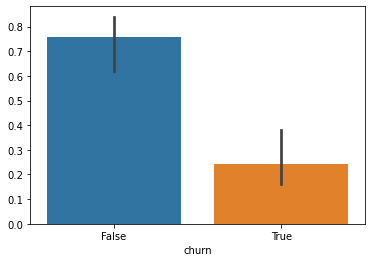

In [18]:
sns.barplot(data = c_pay_type)

In [19]:
c_pay_type = pd.crosstab(df.churn, df.payment_type, normalize = 'index')

<AxesSubplot:xlabel='payment_type'>

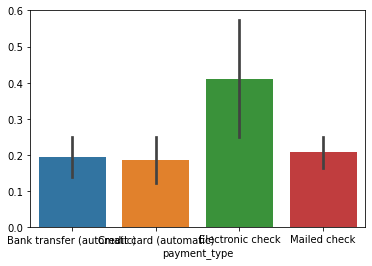

In [20]:
sns.barplot(data = c_pay_type)

In [21]:
#sns.barplot(data = c_pay_type, x= c_pay_type, hue = c_pay_type.index)
#sns wants columns for it's axis. This won't work
#ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [22]:
#so use pd.melt to make churn a column

In [23]:
#go back to shurn being the column
c_pay_type = pd.crosstab(df.payment_type, df.churn, normalize = 'index')

In [24]:
c_pay_type

churn,False,True
payment_type,,
Bank transfer (automatic),0.832471,0.167529
Credit card (automatic),0.847669,0.152331
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


In [25]:
df1 = pd.melt(c_pay_type, ignore_index=False,value_vars = ['False', 'True']  )

In [26]:
df1

,churn,value
payment_type,,
Bank transfer (automatic),False,0.832471
Credit card (automatic),False,0.847669
Electronic check,False,0.547146
Mailed check,False,0.807980
Bank transfer (automatic),True,0.167529
Credit card (automatic),True,0.152331
Electronic check,True,0.452854
Mailed check,True,0.192020


In [27]:
#now that churn is a column, it can be a hue

<AxesSubplot:xlabel='payment_type', ylabel='value'>

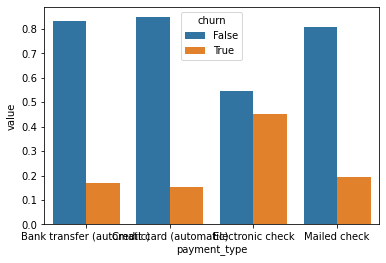

In [28]:
sns.barplot(data = df1, x = df1.index, y= 'value', hue = 'churn')

<AxesSubplot:xlabel='value', ylabel='payment_type'>

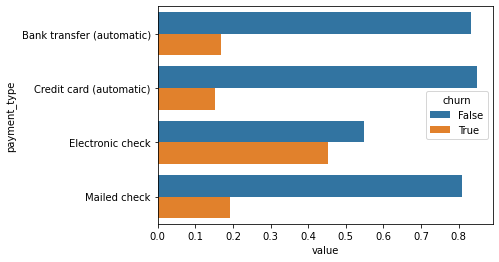

In [29]:
sns.barplot(data = df1, y = df1.index, x= 'value', hue = 'churn')

# Proven it works, so do it for all your variables of interest

In [30]:
c_pay_type = pd.crosstab(df.payment_type, df.churn, normalize = 'index')
c_Phone_serv = pd.crosstab(df.Phone_service, df.churn, normalize = 'index')
c_Int_serv = pd.crosstab(df.Internet_service, df.churn, normalize = 'index')
c_Cont = pd.crosstab(df.Contract, df.churn, normalize = 'index')
c_Serv_type = pd.crosstab(df.Service_type, df.churn, normalize = 'index')
c_sen_cit = pd.crosstab(df.is_senior_citizen, df.churn, normalize = 'index')
c_partn = pd.crosstab(df.partner, df.churn, normalize = 'index')
c_dependents = pd.crosstab(df.dependents, df.churn, normalize = 'index')

In [31]:
melt_pay_type = pd.melt(c_pay_type, ignore_index=False,value_vars = ['False', 'True'])
melt_Phone_serv = pd.melt(c_Phone_serv, ignore_index=False,value_vars = ['False', 'True'])
melt_Int_serv = pd.melt(c_Int_serv, ignore_index=False,value_vars = ['False', 'True'])
melt_Cont = pd.melt(c_Cont, ignore_index=False,value_vars = ['False', 'True'])
melt_Serv_type = pd.melt(c_Serv_type, ignore_index=False,value_vars = ['False', 'True'])
melt_sen_cit = pd.melt(c_sen_cit, ignore_index=False,value_vars = ['False', 'True'])
melt_partn = pd.melt(c_partn, ignore_index=False,value_vars = ['False', 'True'])
melt_dependents = pd.melt(c_dependents, ignore_index=False,value_vars = ['False', 'True'])

<AxesSubplot:ylabel='Phone_service'>

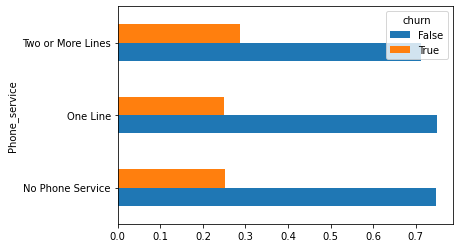

In [32]:
c_Phone_serv.plot(kind = 'barh')

<AxesSubplot:ylabel='Internet_service'>

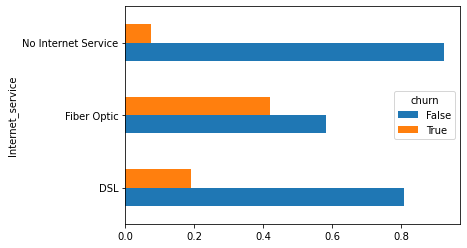

In [33]:
c_Int_serv.plot(kind = 'barh')

<AxesSubplot:ylabel='Contract'>

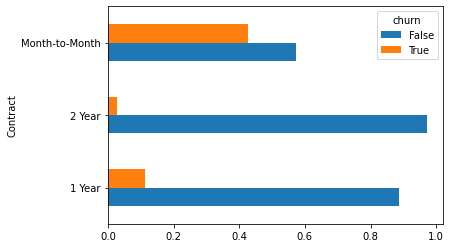

In [34]:
c_Cont.plot(kind = 'barh')

<AxesSubplot:ylabel='Service_type'>

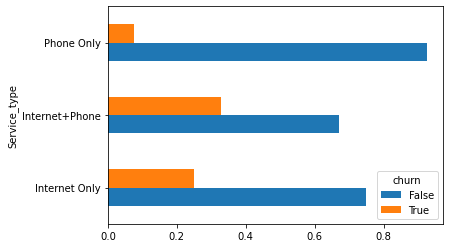

In [35]:
c_Serv_type.plot(kind = 'barh')

# Churn based on catagory variables- woot! woot!!

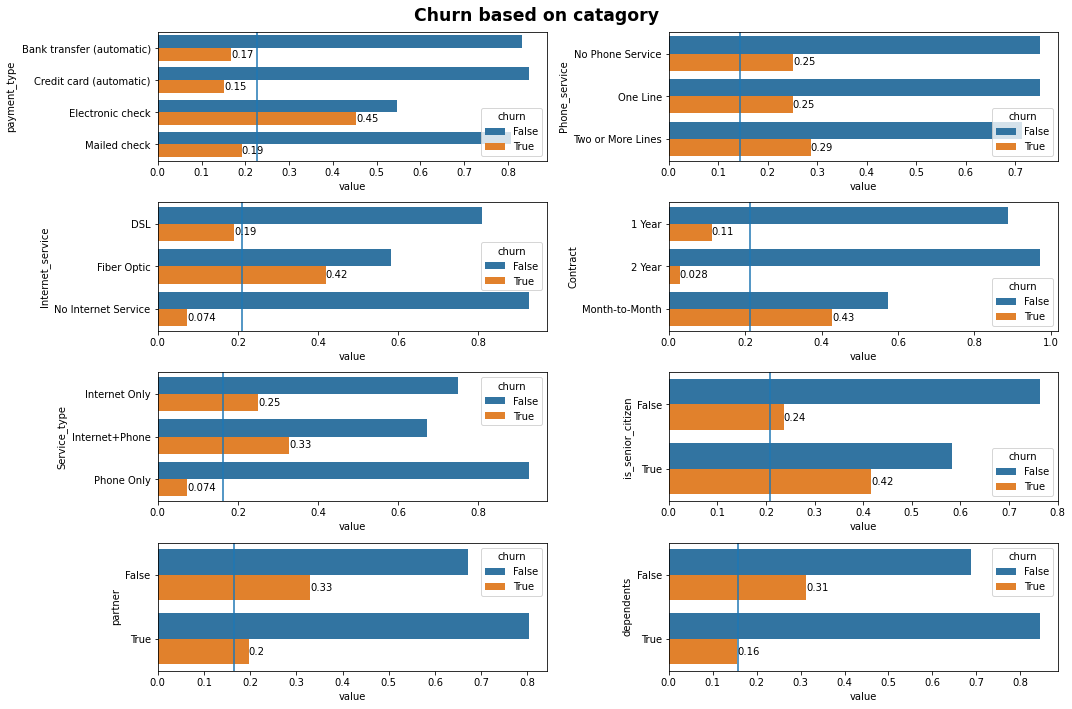

In [36]:
#have to use seaborn or it wont work

plt.figure(figsize= (15,10))
plt.suptitle('Churn based on catagory', fontsize = 'xx-large', weight = 1000)

plt.subplot(421)
aa=sns.barplot(data = melt_pay_type, y = melt_pay_type.index, x= 'value', hue = 'churn')
aa.bar_label(aa.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_pay_type[melt_pay_type.churn == 'True'].value.max()))

plt.subplot(422)
ab=sns.barplot(data = melt_Phone_serv, y = melt_Phone_serv.index, x= 'value', hue = 'churn')
ab.bar_label(ab.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Phone_serv[melt_Phone_serv.churn == 'True'].value.max()))

plt.subplot(423)
ac=sns.barplot(data = melt_Int_serv, y = melt_Int_serv.index, x= 'value', hue = 'churn')
ac.bar_label(ac.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Int_serv[melt_Int_serv.churn == 'True'].value.max()))

plt.subplot(424)
ad=sns.barplot(data = melt_Cont, y = melt_Cont.index, x= 'value', hue = 'churn')
ad.bar_label(ad.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Cont[melt_Cont.churn == 'True'].value.max()))

plt.subplot(425)
ae=sns.barplot(data = melt_Serv_type, y = melt_Serv_type.index, x= 'value', hue = 'churn')
ae.bar_label(ae.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Serv_type[melt_Serv_type.churn == 'True'].value.max()))

plt.subplot(426)
af=sns.barplot(data = melt_sen_cit, y = melt_sen_cit.index, x= 'value', hue = 'churn')
af.bar_label(af.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_sen_cit[melt_sen_cit.churn == 'True'].value.max()))

plt.subplot(427)
ag=sns.barplot(data = melt_partn, y = melt_partn.index, x= 'value', hue = 'churn')
ag.bar_label(ag.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_partn[melt_partn.churn == 'True'].value.max()))

plt.subplot(428)
ah=sns.barplot(data = melt_dependents, y = melt_dependents.index, x= 'value', hue = 'churn')
ah.bar_label(ah.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_dependents[melt_dependents.churn == 'True'].value.max()))

plt.tight_layout()

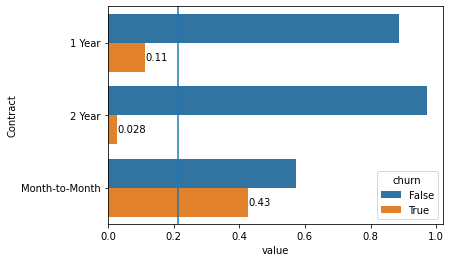

In [37]:
ad=sns.barplot(data = melt_Cont, y = melt_Cont.index, x= 'value', hue = 'churn')
ad.bar_label(ad.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Cont[melt_Cont.churn == 'True'].value.max()))

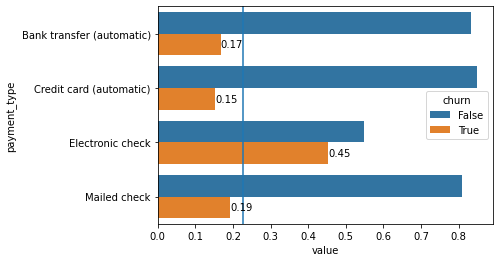

In [38]:
aa=sns.barplot(data = melt_pay_type, y = melt_pay_type.index, x= 'value', hue = 'churn')
aa.bar_label(aa.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_pay_type[melt_pay_type.churn == 'True'].value.max()))


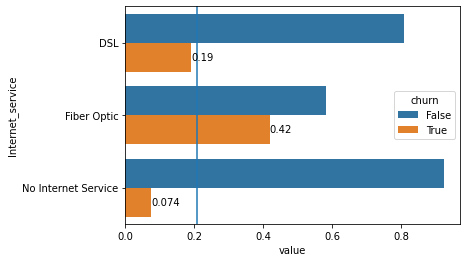

In [39]:
ac=sns.barplot(data = melt_Int_serv, y = melt_Int_serv.index, x= 'value', hue = 'churn')
ac.bar_label(ac.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Int_serv[melt_Int_serv.churn == 'True'].value.max()))

# Churn based on continous variables

In [40]:
df.head()

,is_senior_citizen,partner,dependents,payment_type,monthly_charges,churn,tenure,has_phone,has_internet,has_phone_and_internet,Phone_service,Internet_service,Contract,Service_type
0,False,True,True,Mailed check,65.6,False,9.0,True,True,True,One Line,DSL,1 Year,Internet+Phone
1,False,False,False,Mailed check,59.9,False,9.1,True,True,True,Two or More Lines,DSL,Month-to-Month,Internet+Phone
2,False,False,False,Electronic check,73.9,True,3.8,True,True,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone
3,True,True,False,Electronic check,98.0,True,12.6,True,True,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone
4,True,True,False,Mailed check,83.9,True,3.2,True,True,True,One Line,Fiber Optic,Month-to-Month,Internet+Phone


<AxesSubplot:xlabel='monthly_charges', ylabel='tenure'>

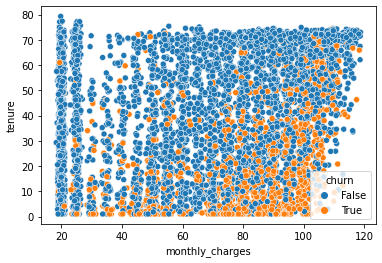

In [41]:
sns.scatterplot(data = df, x =  'monthly_charges', y = 'tenure', hue = 'churn')

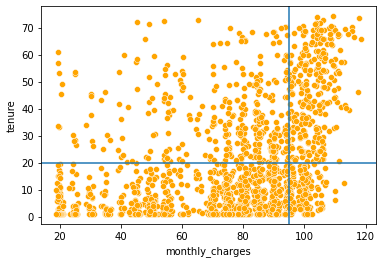

In [42]:
sns.scatterplot(data = df[df.churn=='True'], x =  'monthly_charges', y = 'tenure', color='orange')
#np.polyfit(x =  'monthly_charges', y = 'tenure', 2)
plt.axvline(x=95)
plt.axhline(y=20)

In [43]:
b= df.groupby('Service_type').monthly_charges.mean()

<AxesSubplot:xlabel='Service_type'>

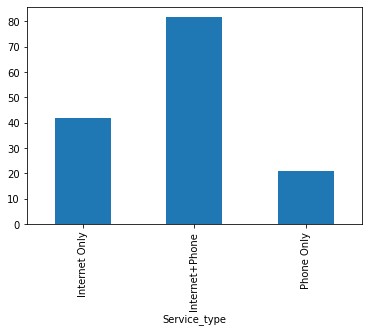

In [44]:
b.plot(kind = 'bar')

In [45]:
b.head() #why is the bundle more expensive?!!?

Service_type
Internet Only     41.975624
Internet+Phone    81.767698
Phone Only        21.073966
Name: monthly_charges, dtype: float64

In [46]:
df.groupby('Contract').tenure.mean()

Contract
1 Year            42.058102
2 Year            57.122170
Month-to-Month    18.020201
Name: tenure, dtype: float64

In [47]:
q = df[df.churn == 'True']

In [48]:
q = q[q.Contract == 'Month-to-Month']

In [49]:
q.groupby('Contract').tenure.mean()

Contract
Month-to-Month    14.000845
Name: tenure, dtype: float64

In [50]:
q.groupby('Contract').tenure.median()

Contract
Month-to-Month    7.4
Name: tenure, dtype: float64

In [51]:
q = q[['Contract', 'tenure']]

In [52]:
q.tenure = q.tenure.round(0)

In [53]:
q = q[q.Contract == 'Month-to-Month']

In [54]:
q.shape

(1656, 2)

In [55]:
l = q.groupby('tenure').count().head(25)

In [56]:
l.head(3)

,Contract
tenure,
1.0,382
2.0,123
3.0,89


<AxesSubplot:xlabel='tenure', ylabel='Churn'>

<Figure size 1440x576 with 0 Axes>

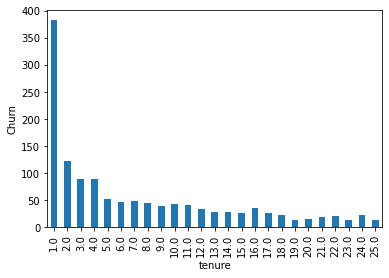

In [57]:
plt.figure(figsize = (20, 8))
l.plot(kind = 'bar', legend =False, ylabel = 'Churn')

In [58]:
df.value_counts('Internet_service')

Internet_service
Fiber Optic            3098
DSL                    2417
No Internet Service    1523
dtype: int64

In [59]:
df.value_counts('Contract')

Contract
Month-to-Month    3876
2 Year            1687
1 Year            1475
dtype: int64

In [60]:
df[df.churn=='False'].value_counts('Contract')

Contract
Month-to-Month    2220
2 Year            1639
1 Year            1309
dtype: int64

In [61]:
df.value_counts('payment_type')

payment_type
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1546
Credit card (automatic)      1523
dtype: int64

In [62]:
df[df.churn=='True'].shape

(1870, 14)

In [63]:
df[df.churn=='False'].shape

(5168, 14)

In [64]:
l=1870/(1870+5168)
l

0.26570048309178745

In [65]:
df[df.churn=='True'].value_counts('Contract')

Contract
Month-to-Month    1656
1 Year             166
2 Year              48
dtype: int64

In [66]:
c = 1656/(1870)
c

0.8855614973262033

### Month to month??

In [67]:
df.tenure = df.tenure.round(0)

In [68]:
p = df[df.churn=='True'].groupby('tenure').count()
p.churn.head()

tenure
1.0    382
2.0    125
3.0     89
4.0     90
5.0     54
Name: churn, dtype: int64

In [69]:
p.churn.mean()

25.27027027027027

In [70]:
382+125 -50

457

In [71]:
457/1870

0.24438502673796791